In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sin,cos

In [2]:
print(sin(pi))
#the problem is, pi in math is a float that's 3.14....sth, and it won't return exactly 0 but something very close to 0 at this point,
#however, considering that since my time values will basically be impossible equals exactly pi,it should be fine and accurate enough.

1.2246467991473532e-16


In [3]:
def rk45_lotka_volterra(func,tspan,y0,params):
    #func      the function used to describe the lotka volterra system
    #tspan     the interval of time
    #y0        initial conditions, should be an 1-d array of size (n,)
    #params      an array that should contain 4 parameters a,b,c,d
    #a           birth rate of rabbits
    #b           death rate of rabbits
    #c           bith rate of foxes
    #d           death rate of foxes
    sol=integrate.solve_ivp(func,tspan,y0,max_step=0.33,args=(params,))#I really don't understand this args=(params,)syntax, 
    #but it should be able to pass on the parameters, I don't understand why is it written in this way though, 
    #and why wouldn't it return some form of tuple.
    T=sol.t
    sol=sol.y #the values array for the species
    rabbit=sol[0]
    fox=sol[1]
    eagle=sol[2]
    time=T[-1]
    num_rabbit=rabbit[-1]
    num_fox=fox[-1]
    num_eagle=eagle[-1]
    print('at t=',time,', the number of the rabbits are',num_rabbit,', the number of the foxes are',num_fox,'the number of the eagles are',num_eagle)
    plt.plot(T,rabbit,'r')
    plt.plot(T,fox,'b')
    plt.plot(T,eagle,'g')
    plt.xlabel('time')
    plt.title('runge kutta method')
    plt.show

In [4]:
def func(t,y,params):#the function to describe the drabbits and dfoxes and deagles.
    #y           an array containing the 1) the number of rabbits 2) the number of foxes. 3) the number of eagles
    #params      an array that should contain 6 parameters a,b,c,d,e,f
    #a           initial birth rate of rabbits
    #b           initial death rate of rabbits eaten by foxes
    #c           initial bith rate of foxes
    #d           initial death rate of foxes eaten by eagles
    #e           initial birth rate of eagles
    #f           initial death rate of eagles
    #to involve a time factor, I am using sinusoidal functions, so the value of the constant will be oscillating in a range, I don't know how to scientifically explain
    #it though, I will make the period of the sinusoidal function 360 years, so that maybe for some constant, the first half of the year will increase and vice versa
    #for the second half of the year, like birthrate is high in the summer and low in the winter.
    a=params[0]
    da=0.2*sin((pi/180)*t) #doing so will make this constant's difference with it's initial value oscillating around [-2,2], and the period will be 360 days which is
    #roughly a year
    a=a+da
    b=params[1]
    db=-0.1*sin((pi/180)*t)
    b=b+db
    c=params[2]
    dc=0.15*sin((pi/180)*t)
    c=c+dc
    d=params[3]
    dd=0.1*sin((pi/180)*t)+0.1
    d=d+dd
    e=params[4]
    de=0.1*sin((pi/180)*t)
    e=e+de
    f=params[5]
    df=0.2*sin((pi/180)*t)
    f=f+df
    
    X=y[0]
    Y=y[1]
    Z=y[2]
    dx=(a*X)-(b*X*Y)
    dy=(c*X*Y)-(d*Y*Z)
    dz=(e*Y*Z)-(f*Z)
    return([dx,dy,dz])

at t= 26.0 , the number of the rabbits are 156.36277289907716 , the number of the foxes are 1.4225317017024177e-05 the number of the eagles are 451.71150138616184


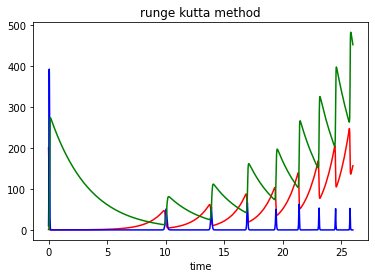

In [5]:
tspan=[0,26]
y0=[200,10,1]
params=[0.7,0.3,0.6,0.2,0.2,0.3]#I always think there is something about the equation, so C(the eating rate of foxes) should be proportional to rabbit/foxes,
#such that if there is more rabbit than foxes, eating rate will be higher, and if there is less rabbits than foxes, eating rate will be lower, instead of 
#proportional directly to XY, same for the eating rate of eagles. I think that would make the model a lot better and more accurate, my idea is something like
#eating rate = (c*y^2)/x
rk45_lotka_volterra(func,tspan,y0,params)

In [6]:
tspan=[0,100]
y0=[200,10,1]
params=[0.7,0.3,0.6,0.2,0.2,0.3]
sol=integrate.solve_ivp(func,tspan,y0,max_step=0.33,args=(params,))

In [7]:
sol

  message: 'Required step size is less than spacing between numbers.'
     nfev: 3044
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([0.00000000e+00, 1.44619291e-02, 2.97750274e-02, 4.45989694e-02,
       5.29444371e-02, 6.12899048e-02, 6.99326254e-02, 7.85191276e-02,
       8.76772002e-02, 9.83135695e-02, 1.13612422e-01, 1.27952818e-01,
       1.40485735e-01, 1.53018652e-01, 1.65094863e-01, 1.77006170e-01,
       1.88888566e-01, 2.00788102e-01, 2.12725846e-01, 2.24719276e-01,
       2.36799584e-01, 2.49040832e-01, 2.61620427e-01, 2.74922472e-01,
       2.89637322e-01, 3.06777229e-01, 3.27721258e-01, 3.54526917e-01,
       3.90562098e-01, 4.40120805e-01, 4.88325084e-01, 5.36529363e-01,
       5.81549824e-01, 6.23483626e-01, 6.66654548e-01, 7.14900538e-01,
       7.67150535e-01, 8.17823769e-01, 8.64070124e-01, 9.09160273e-01,
       9.58499416e-01, 1.01393007e+00, 1.07075502e+00, 1.12311349e+00,
       1.17172992e+00, 1.22249820e+00, 1.28019703

In [8]:
#set t for 100 or larger number would report such error, I searched for why this issue might happen, they say sth like the scales of my varaibles are too high(I am not sure whether I understand it correctly)
#and that solve_ivp would just crush.'You have set C so high that the system explodes with respect to the numerical accuracy achievable with double precision.'